### Doco for figuring out how to use Manim and what I want to use it for.
Some Ideas for use cases are:
- The convolving kernel.
- The UNET architecture.
- The Zipf distribution. ✅
- The evolving dummy city timesteps.
- Intro slide. ✅

Installation is following [this](https://docs.manim.community/en/stable/installation/linux.html) guide.

In [1]:
from manim import *

Manim Community v0.16.0.post0

When following the community installation instructions, I initially got an error
when importing Manim. This was fixed by running:
`conda install -c conda-forge pycairo`

In [2]:
config.media_width = "80%"
config.verbosity = "WARNING"

## Some useful examples for future reference:

In [ ]:
%%manim -qm SecondExample

class SecondExample(Scene):
    def construct(self):
        ax = Axes(x_range=(-3, 3), y_range=(-3, 3))
        curve = ax.plot(lambda x: (x+2)*x*(x-2)/2, color=RED)
        area = ax.get_area(curve, x_range=(-2, 0))
        self.play(Create(ax, run_time=2), Create(curve, run_time=5)) # Animation call x2
        self.play(FadeIn(area)) # Animation call
        self.wait(2) # How long it waits before it starts next loop of vid.

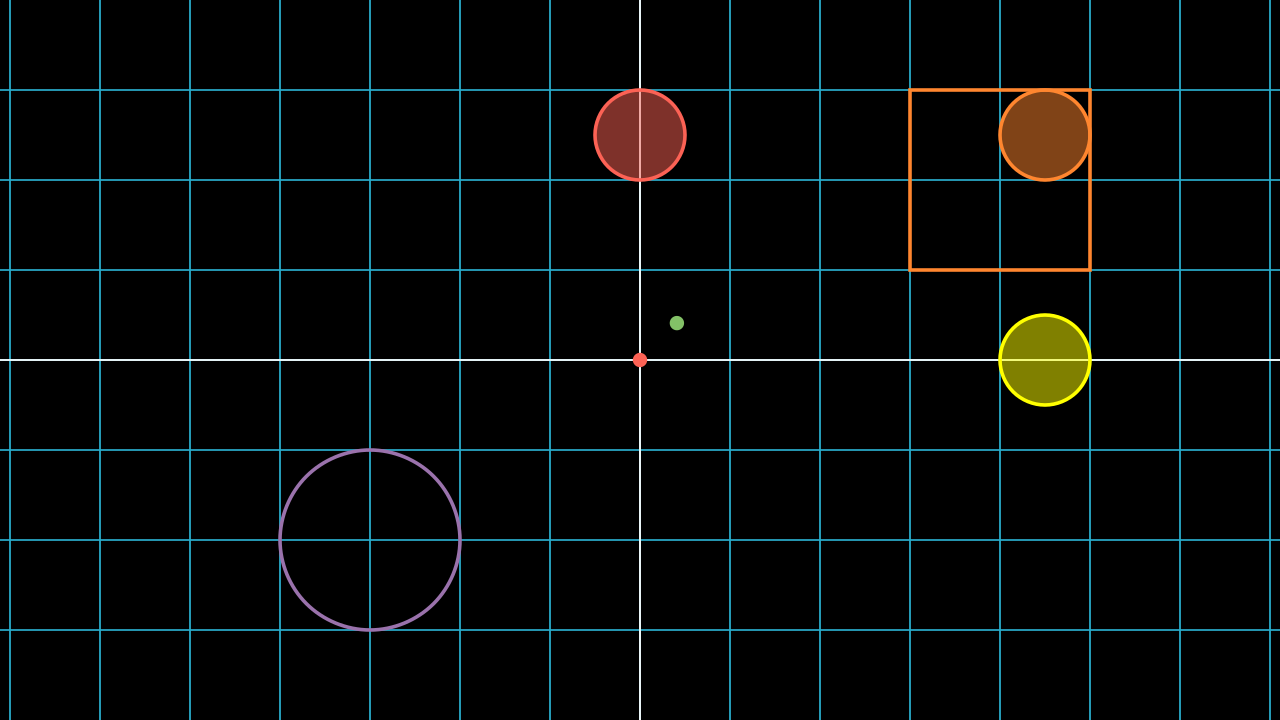

In [ ]:
%%manim -qm Positioning

class Positioning(Scene):
    def construct(self):
        plane = NumberPlane() # defines grid
        self.add(plane) # adds grid

        # next_to from episode 1
        red_dot = Dot(color=RED)
        green_dot = Dot(color=GREEN)
        green_dot.next_to(red_dot, RIGHT + UP)  # RIGHT == [1, 0, 0]
        self.add(red_dot, green_dot)

        # shift
        s = Square(color=ORANGE)
        s.shift(2*UP + 4*RIGHT)
        self.add(s)

        # move_to
        c = Circle(color=PURPLE)
        c.move_to([-3, -2, 0])
        self.add(c)

        # align_to
        c2 = Circle(radius=0.5, color=RED, fill_opacity=0.5)
        c3 = c2.copy().set_color(YELLOW)
        c4 = c2.copy().set_color(ORANGE)
        c2.align_to(s, UP)
        c3.align_to(s, RIGHT)
        c4.align_to(s, UP + RIGHT)
        self.add(c2, c3, c4)

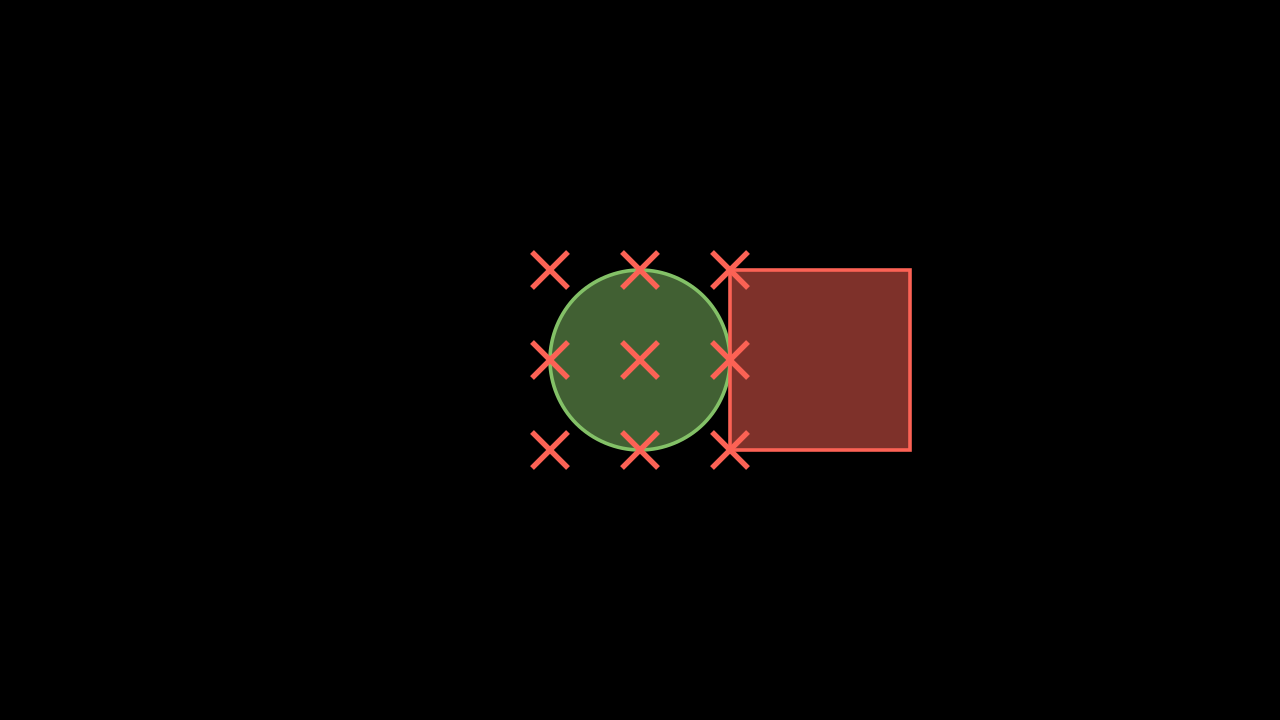

In [ ]:
%%manim -qm CriticalPoints

class CriticalPoints(Scene):
    def construct(self):
        c = Circle(color=GREEN, fill_opacity=0.5)
        self.add(c)

        for d in [(0,0,0), UP, UR, RIGHT, DR, DOWN, DL, LEFT, UL]:
            self.add(Cross(scale_factor=0.2).move_to(c.get_critical_point(d)))

        s = Square(color=RED, fill_opacity=0.5)
        s.move_to([1,0,0], aligned_edge=LEFT)
        self.add(s)
        

## My animations for my presentation:

In [ ]:
%%manim -qm TestMyIdea

config.background_color = BLACK

class TestMyIdea(Scene):
    def construct(self):
        Text.set_default(color=GREEN, font_size=30)
        first = Text("Growing cities:\n a machine learning approach")

        Text.set_default(color=BLUE, font_size=20)
        second = Text("Johnny Lowis, PHYS391").next_to(first, DOWN)

        self.play(FadeIn(first, run_time=2), FadeIn(second, run_time=5))
        self.wait(2)
        

### Now let us try animating the Zipf distribution that we will be using

In [5]:
def zipf(r, N=100, s=1):
    """ Here I am trying to functionalise the above distribution, where r = k = distance from centre.
        Further changes can be made as well, but for now I just fixed the values of N and s."""
    iterator = np.array([1/n for n in range(1, N)]).sum()
    return np.array((1/(r**s)))/iterator

In [57]:
%%manim -qh Zipf

config.background_color = BLACK
config.frame_width = 16
config.frame_height = 16

config.pixel_width = 1080
config.pixel_height = 1920

class Zipf(Scene):
    def construct(self):
        ax = Axes(x_range=(0.1, 3), y_range=(0, 1.2), 
            x_axis_config={
                "numbers_to_include": np.arange(0.1, 3.1, 1),
                "numbers_with_elongated_ticks": np.arange(0, 3, 1),
                "decimal_number_config": {"num_decimal_places": 0},
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 1.2, .2),
                "numbers_with_elongated_ticks": np.arange(0, 1, .1),
                "decimal_number_config": {"num_decimal_places": 2},
            },)
        curve = ax.plot(lambda x: zipf(x, N=100, s=1), color=RED)
        area = ax.get_area(curve, x_range=(0.2, 1))

        Text.set_default(color=BLUE, font_size=30)
        title = Text("Zipf Cumulative Distribution Function").next_to(area, UR)
        formula = MathTex(r'{\displaystyle f(k;s,N)={\frac {1/k^{s}}{\sum \limits _{n=1}^{N}(1/n^{s})}}}').next_to(title, DOWN)

        # self.play(FadeIn(title, run_time=2), FadeIn(second, run_time=5))
        self.play(FadeIn(title, run_time=2), FadeIn(formula, run_time=2), Create(ax, run_time=2), Create(curve, run_time=5)) # Animation call x2
        self.play(FadeIn(area)) # Animation call
        self.wait(2) # How long it waits before it starts next loop of vid.